Desafio do Kaggle sobre o preço de casa.

In [8]:
# Importando os pacotes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Lendo os arquivos

sample = pd.read_csv('datasets/sample_submission.csv')
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

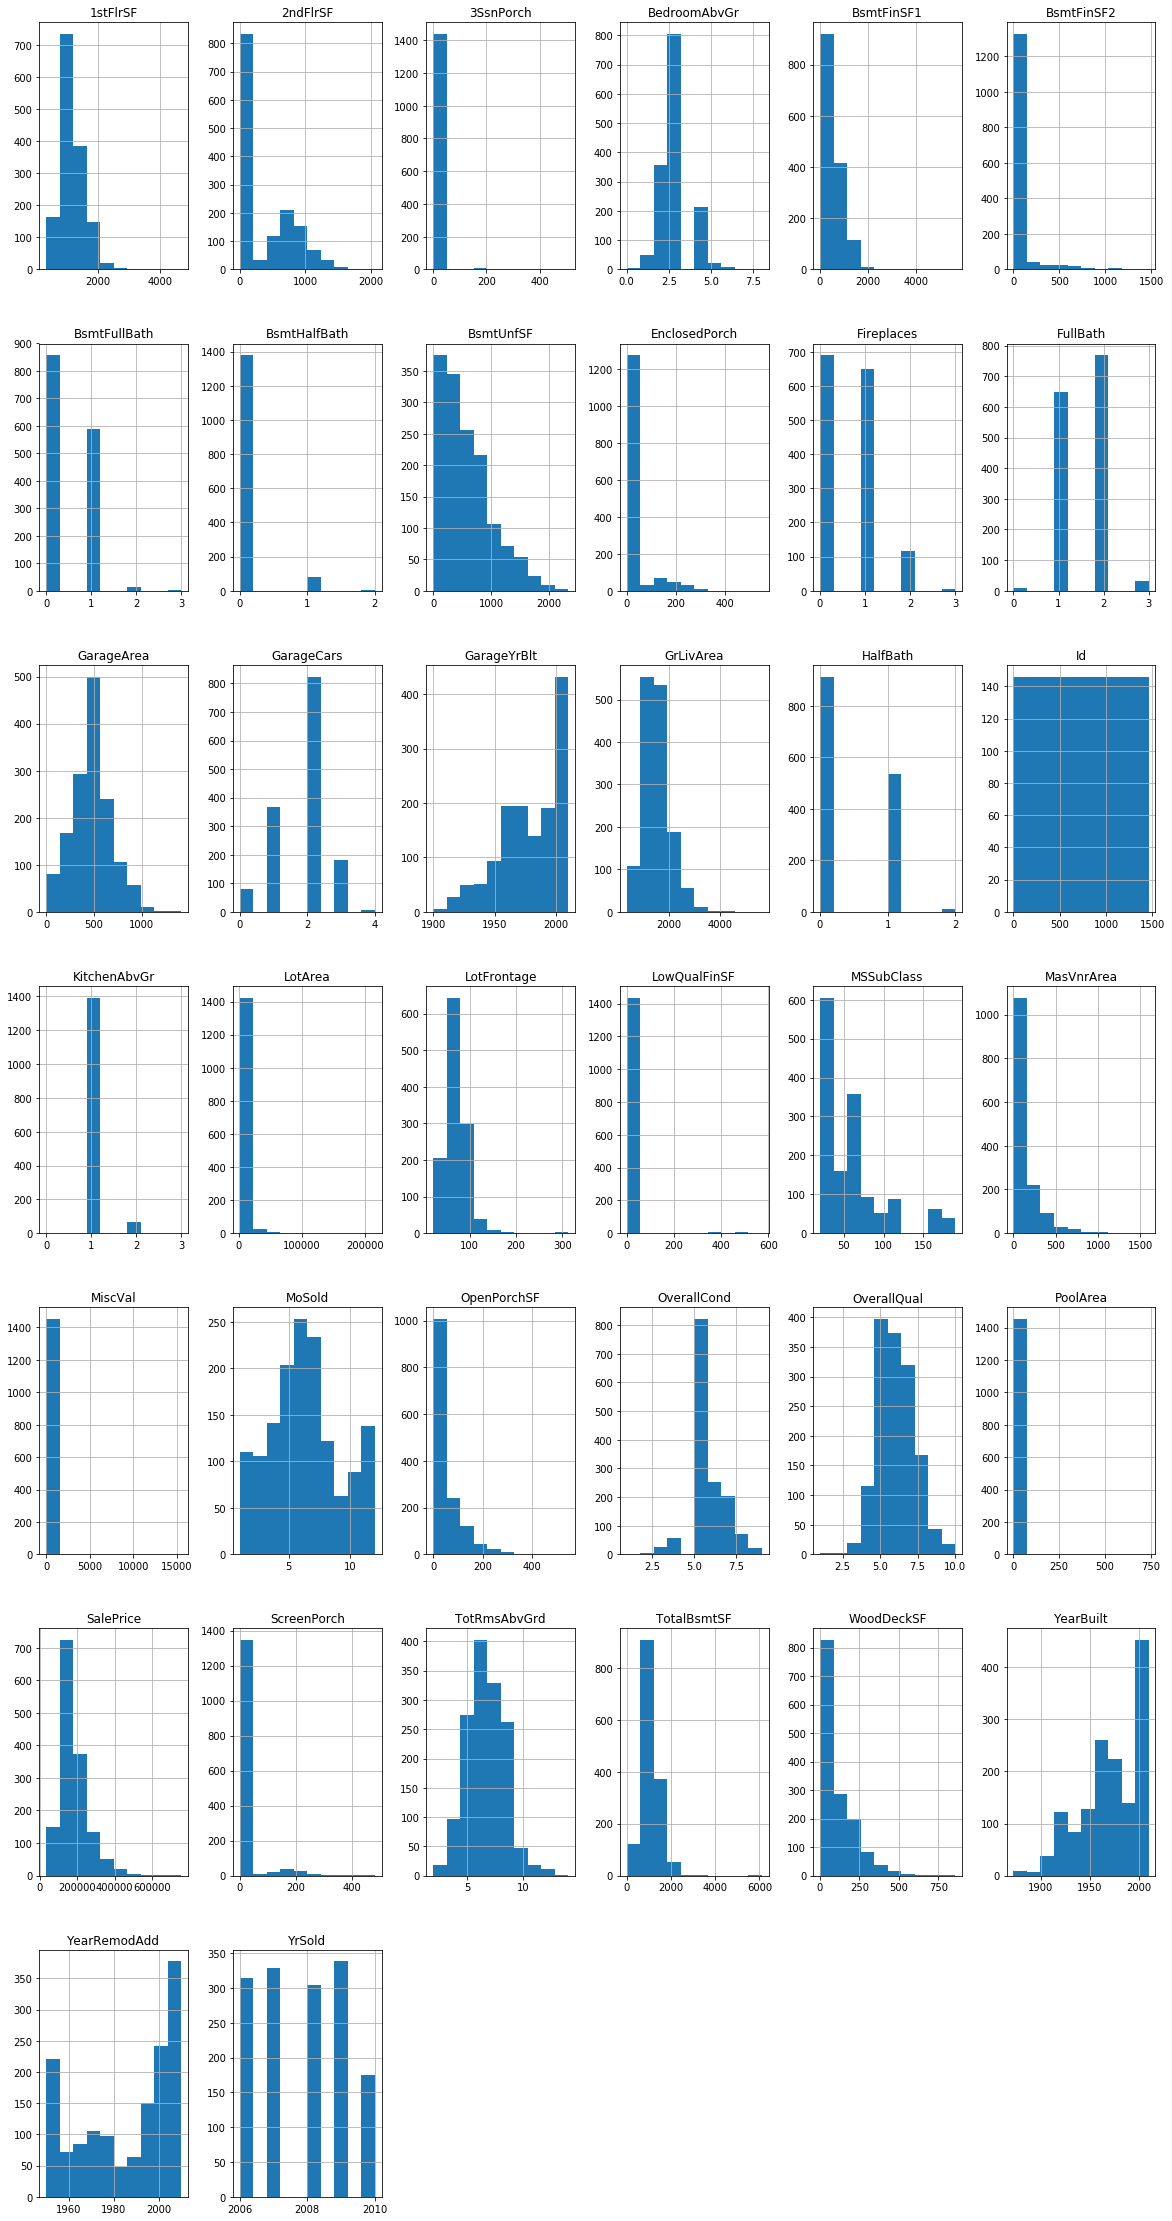

In [20]:
train.hist(figsize=(20,40))
plt.show()

In [181]:
df = train.copy()

In [182]:
corr_mat = df.corr()

In [183]:
corr_mat['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [196]:
house = df[['OverallQual', 'GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF', 'SalePrice']]
test_modelo = test[['OverallQual', 'GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF']]
x = df[['OverallQual', 'GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF']]
y = df['SalePrice']
house.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,180921.195890
std,1.382997,525.480383,0.747315,213.804841,438.705324,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,129975.000000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,163000.000000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,214000.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,755000.000000


In [186]:
house.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
SalePrice      0
dtype: int64

In [187]:
house.isna().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
SalePrice      0
dtype: int64

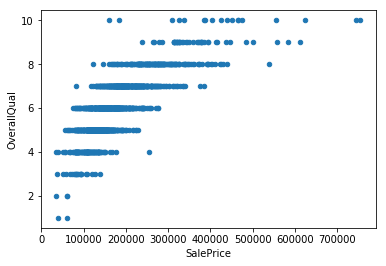

In [189]:
house.plot(kind='scatter',x='SalePrice', y='OverallQual')

In [190]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [191]:
lin_reg.intercept_

-99072.05038623852

In [197]:
test_modelo.fillna(0, inplace=True)

In [198]:
test_modelo.isna().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
dtype: int64

In [199]:
reg = lin_reg.predict(test_modelo)
reg

array([114568.83751429, 164757.9875673 , 159551.62764989, ...,
       152121.54494302,  91817.78050759, 243209.76854418])

In [201]:
test['SalePrice'] = reg
t = pd.DataFrame(test[['Id', 'SalePrice']])

In [202]:
sample_test = pd.DataFrame(test['SalePrice'])
sample_test.index = test['Id']
sample_test

,SalePrice
Id,
1461,114568.837514
1462,164757.987567
1463,159551.627650
1464,181784.385822
1465,226130.678389
1466,178448.280534
1467,169641.865004
1468,169846.343054
1469,205891.795689


In [204]:
sample_test.to_csv('sample_submission3.csv')